# Introduction

- Our client for this project is SWIPECAR, an American company deals in second hand cars.
- They initiated their business in the late 80s and have gained huge popularity over the years.
- The company clients are local and foreign customers who seek to buy and sell second hand cars.

# Problem Statement

- Company has started facing loss in business due to the technical advancements.
- The company is pretty old and they have been using traditional measures to estimate old cars prices.
- These traditional measures include weight analysis, condition of parts and build year.

The current process suffers from the following problems:

- They have been using manual traditional measures to estimate old cars prices.
- These measures are time consuming and not accurate.

Now, company is looking for a robust way to estimate the prices of used cars.



# Data Description

The Dataset contains the following columns:

| Dataset Feature	  |  Description|
|--|--|
|ID	 |Feature uniquely identifying each record|
| column Name	 |  Feature uniquely identifying each record|
|symbolling	|Degree to which the auto is riskier than its price indicates.|
|normalized-losses	|Relative average loss payment per insured vehicle year.|
|make	|Make of the car.|
|fuel-type	|Type of fuel consumed by the car.|
|aspiration	|Type of internal combustion engine used.|
|num-of-doors	|Number of doors available in the car.|
|body-style	|Body style of car.|
|drive-wheels	|Drive wheel of car.|
|engine-location	|Location of engine in car.|
|wheel-base	|Distance between the centres of the front and rear wheels.|
|length	|Length of the car.|
|post_code	|Postal Code of the customer.|
|width	|Width of the car.|
|height	|Height of the car|.
|curb-weight	|Total mass of a vehicle with standard equipment.|
|engine-type	|Type of engine used in the car.|
|num-of-cylinders	|Number of cylinders used in the car.|
|engine-size	|Size of the engine used in the car.|
|fuel-system	|Type of fuel system used in the car|
|bore	|Diameter of each cylinder in the piston engine.|
|stroke	|Full travel of the piston along the cylinder, in either direction.|
|compression-ratio	|Volume of the cylinder and the combustion chamber when the piston is at the bottom, and the volume of the combustion chamber when the piston is at the top.|
|horsepower	|The power an engine produces by a car.|
|peak-rpm	|The max power produced by engine in terms of revolutions per minute.|
|city-mpg	|City mileage per gallon rating of car.|
|highway-mpg	|Highway mileage per gallon rating of car.|
|price	|Price of the car.|

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
# Importing pyplot interface using matplotlib
import matplotlib.pyplot as plt                                     
# Importing seaborm library for interactive visualization
import seaborn as sns                                               
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split               
from sklearn.linear_model import LinearRegression
# Importing warning to disable runtime warnings
import warnings                                                     
# Warnings will appear only once
warnings.filterwarnings("ignore")  
import matplotlib.pyplot as plt
from scipy.stats import iqr
# stats
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.2f' % x)         # To suppress scientific notation over exponential values
pd.options.display.precision = 2
pd.options.display.float_format = '{:.2f}'.format
import re
import calendar
import random
from sklearn.preprocessing import PolynomialFeatures
from itertools import product
import statsmodels.formula.api as smf
from IPython.display import HTML, display
from sklearn.preprocessing import PolynomialFeatures
from itertools import product
import plotly.graph_objects as go

from statsmodels.iolib.summary2 import summary_col
from linearmodels.iv import IV2SLS

# Data Acquisition
## Details of train and test data

In [2]:
car_test_data = pd.read_csv("car_test.csv", index_col = 0, na_values=[' ', '?', "", '-','|'])
car_train_data = pd.read_csv("car_train.csv", index_col = 0, na_values=[' ', '?', "", '-','|'])

### **Data Description**  and  **Data Information**

- To get some quick description out of the data you can use describe method defined in pandas library.

In [3]:
print(car_train_data.shape)
print(car_test_data.shape)

(181, 26)
(20, 25)


In [4]:
car_train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181 entries, 1 to 181
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          181 non-null    int64  
 1   normalized-losses  147 non-null    float64
 2   make               181 non-null    object 
 3   fuel-type          181 non-null    object 
 4   aspiration         181 non-null    object 
 5   num-of-doors       179 non-null    object 
 6   body-style         181 non-null    object 
 7   drive-wheels       181 non-null    object 
 8   engine-location    181 non-null    object 
 9   wheel-base         181 non-null    float64
 10  length             181 non-null    float64
 11  width              181 non-null    float64
 12  height             181 non-null    float64
 13  curb-weight        181 non-null    int64  
 14  engine-type        181 non-null    object 
 15  num-of-cylinders   181 non-null    object 
 16  engine-size        181 non

In [5]:
print(car_train_data.isnull().sum())

symboling             0
normalized-losses    34
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64


In [6]:
print(car_test_data.isnull().sum())

symboling            0
normalized-losses    3
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
dtype: int64


# Observations

- The dataset is divided into two parts: Train, and Test sets.

Train Set:
- The train set contains 181 rows and 27 columns.
- The last column price is the target variable.

Test Set:
- The test set contains 20 rows and 26 columns.

Target Variable:
- Price which needs to be predicted

This data set consists of three types of entities:

- The assigned insurance risk rating
- Normalized losses in use as compared to other cars
- The relative average loss payment per insured vehicle year.

The second rating corresponds to the degree to which the auto is riskier than its price indicates.
Cars are initially assigned a risk factor symbol associated with its price.
Then, if it is more or less risky this symbol is adjusted by moving it up or down the scale.
A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

The third rating corresponds to a  value which is normalized for all autos within a particular size
classification (two-door small, station wagons, sports/speciality) and represents the average loss per car per year.

In [7]:
print('Contains Duplicate Rows in training data?', car_train_data.duplicated().any())
print('Contains Duplicate Rows in testing data?', car_test_data.duplicated().any())

Contains Duplicate Rows in training data? False
Contains Duplicate Rows in testing data? False


In [8]:
car_train_data.drop_duplicates(subset=None, keep='first' )

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
ID,,,,,,,,,,,,,,,,,,,,,,,,,,
1,-1,65.00,toyota,gas,std,four,hatchback,fwd,front,102.40,175.60,66.50,53.90,2458,ohc,four,122,mpfi,3.31,3.54,8.70,92.00,4200.00,27,32,11248
2,0,188.00,bmw,gas,std,two,sedan,rwd,front,101.20,176.80,64.80,54.30,2710,ohc,six,164,mpfi,3.31,3.19,9.00,121.00,4250.00,21,28,20970
3,0,NaN,renault,gas,std,four,wagon,fwd,front,96.10,181.50,66.50,55.20,2579,ohc,four,132,mpfi,3.46,3.90,8.70,NaN,NaN,23,31,9295
4,0,161.00,peugot,diesel,turbo,four,sedan,rwd,front,107.90,186.70,68.40,56.70,3197,l,four,152,idi,3.70,3.52,21.00,95.00,4150.00,28,33,13200
5,-2,103.00,volvo,gas,std,four,sedan,rwd,front,104.30,188.80,67.20,56.20,2935,ohc,four,141,mpfi,3.78,3.15,9.50,114.00,5400.00,24,28,15985
6,1,118.00,dodge,gas,turbo,two,hatchback,fwd,front,93.70,157.30,63.80,50.80,2128,ohc,four,98,mpfi,3.03,3.39,7.60,102.00,5500.00,24,30,7957
7,0,145.00,jaguar,gas,std,four,sedan,rwd,front,113.00,199.60,69.60,52.80,4066,dohc,six,258,mpfi,3.63,4.17,8.10,176.00,4750.00,15,19,32250
8,3,NaN,porsche,gas,std,two,hardtop,rwd,rear,89.50,168.90,65.00,51.60,2756,ohcf,six,194,mpfi,3.74,2.90,9.50,207.00,5900.00,17,25,32528
9,0,89.00,subaru,gas,std,four,wagon,fwd,front,97.00,173.50,65.40,53.00,2455,ohcf,four,108,mpfi,3.62,2.64,9.00,94.00,5200.00,25,31,10198


In [9]:
car_test_data.drop_duplicates(subset=None, keep='first' )

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
ID,,,,,,,,,,,,,,,,,,,,,,,,,
1,-2,103.00,volvo,gas,std,four,sedan,rwd,front,104.30,188.80,67.20,56.20,2912,ohc,four,141,mpfi,3.78,3.15,9.50,114,5400,23,28
2,0,188.00,bmw,gas,std,four,sedan,rwd,front,101.20,176.80,64.80,54.30,2765,ohc,six,164,mpfi,3.31,3.19,9.00,121,4250,21,28
3,-1,74.00,volvo,gas,turbo,four,wagon,rwd,front,104.30,188.80,67.20,57.50,3157,ohc,four,130,mpfi,3.62,3.15,7.50,162,5100,17,22
4,1,154.00,plymouth,gas,std,four,sedan,fwd,front,93.70,167.30,63.80,50.80,1989,ohc,four,90,2bbl,2.97,3.23,9.40,68,5500,31,38
5,1,103.00,nissan,gas,std,four,wagon,fwd,front,94.50,170.20,63.80,53.50,2037,ohc,four,97,2bbl,3.15,3.29,9.40,69,5200,31,37
6,2,94.00,volkswagen,diesel,turbo,four,sedan,fwd,front,97.30,171.70,65.50,55.70,2319,ohc,four,97,idi,3.01,3.40,23.00,68,4500,37,42
7,0,118.00,mazda,gas,std,four,sedan,rwd,front,104.90,175.00,66.10,54.40,2670,ohc,four,140,mpfi,3.76,3.16,8.00,120,5000,19,27
8,0,161.00,peugot,gas,std,four,sedan,rwd,front,107.90,186.70,68.40,56.70,3020,l,four,120,mpfi,3.46,3.19,8.40,97,5000,19,24
9,1,101.00,honda,gas,std,two,hatchback,fwd,front,93.70,150.00,64.00,52.60,1956,ohc,four,92,1bbl,2.91,3.41,9.20,76,6000,30,34


In [10]:
num_cols = []
for column in car_train_data.select_dtypes(exclude=['object', 'datetime64[ns]']):
    #print(car_train_data[column].dtype)
    #print(column)
    num_cols.append(column)
    
    
l_num=list(num_cols)
print(l_num)

print("No of numerical cols ",len(num_cols))
numeric_df = car_train_data[num_cols]


['symboling', 'normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
No of numerical cols  16


In [11]:
obj_cols = []
for column in car_train_data.select_dtypes(include=['object', 'datetime64[ns]']):
    #print(car_train_data[column].dtype)
    #print(column)
    obj_cols.append(column)
    #print(num_cols)
    #print(len(num_cols))

l_col=list(obj_cols)
print(l_col)
#print(obj_cols)
print("No of object cols ",len(obj_cols))
obj_df = car_train_data[obj_cols]
#obj_df

['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system']
No of object cols  10


In [12]:
print(car_train_data.shape[1]-len(num_cols) == len(obj_cols))

True


In [13]:
categorical_features = car_train_data.select_dtypes(include=[np.object]).columns
categorical_features 

Index(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
       'fuel-system'],
      dtype='object')

In [14]:
numerical_features = car_train_data.select_dtypes(include=[np.number]).columns
numerical_features

Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [15]:
for c in car_train_data.select_dtypes(exclude=['object', 'datetime64[ns]']):
    #print("col is",c)
    if car_train_data[c].isna().sum() != 0:
        #print(c)
        med_c = car_train_data[c].median()
        #print(med_c)
        car_train_data[c]=car_train_data[c].replace(to_replace=np.nan, value=med_c)
        decimals = 2    
        car_train_data[c] = car_train_data[c].apply(lambda x: round(x, decimals))
    else:
        decimals = 2    
        car_train_data[c] = car_train_data[c].apply(lambda x: round(x, decimals))

In [16]:
for c in car_test_data.select_dtypes(exclude=['object', 'datetime64[ns]']):
    #print("col is",c)
    if car_test_data[c].isna().sum() != 0:
        #print(c)
        med_c = car_test_data[c].median()
        #print(med_c)
        car_test_data[c]=car_test_data[c].replace(to_replace=np.nan, value=med_c)
        decimals = 2    
        car_test_data[c] = car_test_data[c].apply(lambda x: round(x, decimals))
    else:
        decimals = 2    
        car_test_data[c] = car_test_data[c].apply(lambda x: round(x, decimals))

In [17]:
car_train_data["body-style"].mode()[0]

'sedan'

In [18]:
car_test_data["body-style"].mode()[0]

'sedan'

In [19]:
for co in car_train_data.select_dtypes(include=['object']):
    #print("col is",co)
    if car_train_data[co].isna().sum() != 0:
        #print("insideif loop", co)
        med_co = car_train_data[co].mode()[0]
        print(med_co)
        car_train_data[co]=car_train_data[co].replace(to_replace=np.nan, value=med_co)      

four


In [20]:
for co in car_test_data.select_dtypes(include=['object']):
    #print("col is",co)
    if car_test_data[co].isna().sum() != 0:
        #print("insideif loop", co)
        med_co = car_test_data[co].mode()[0]
        print(med_co)
        car_test_data[co]=car_test_data[co].replace(to_replace=np.nan, value=med_co)   

In [21]:
car_train_data["num-of-doors"].unique()

array(['four', 'two'], dtype=object)

In [22]:
car_test_data["num-of-doors"].nunique()

2

In [23]:
car_train_data['drive-wheels'].value_counts(normalize=True)

fwd   0.60
rwd   0.36
4wd   0.04
Name: drive-wheels, dtype: float64

In [24]:
car_train_data["num-of-doors"].value_counts(normalize=True)

four   0.57
two    0.43
Name: num-of-doors, dtype: float64

In [25]:
car_train_data['make'].value_counts(normalize=True)

toyota          0.15
mazda           0.09
nissan          0.09
mitsubishi      0.07
honda           0.07
subaru          0.07
volkswagen      0.06
dodge           0.05
peugot          0.05
volvo           0.05
mercedes-benz   0.04
plymouth        0.03
audi            0.03
saab            0.03
bmw             0.03
porsche         0.02
jaguar          0.02
alfa-romero     0.02
chevrolet       0.02
isuzu           0.01
renault         0.01
mercury         0.01
Name: make, dtype: float64

In [26]:
for column in car_train_data.select_dtypes(include=['object']):
    m = car_train_data[column].nunique() 
    #print("length of ",column, m)
    if (car_train_data[column].nunique() < 5):         
        print(column)    
        print(car_train_data[column].unique())      

fuel-type
['gas' 'diesel']
aspiration
['std' 'turbo']
num-of-doors
['four' 'two']
drive-wheels
['fwd' 'rwd' '4wd']
engine-location
['front' 'rear']


In [27]:
for column in car_test_data.select_dtypes(include=['object']):
    mc = car_test_data[column].nunique() 
    print("length of ",column, mc)
    if (car_test_data[column].nunique() < 5):         
        print(column)    
        print(car_test_data[column].unique())      

length of  make 12
length of  fuel-type 2
fuel-type
['gas' 'diesel']
length of  aspiration 2
aspiration
['std' 'turbo']
length of  num-of-doors 2
num-of-doors
['four' 'two']
length of  body-style 3
body-style
['sedan' 'wagon' 'hatchback']
length of  drive-wheels 2
drive-wheels
['rwd' 'fwd']
length of  engine-location 1
engine-location
['front']
length of  engine-type 3
engine-type
['ohc' 'l' 'dohc']
length of  num-of-cylinders 3
num-of-cylinders
['four' 'six' 'five']
length of  fuel-system 4
fuel-system
['mpfi' '2bbl' 'idi' '1bbl']


In [28]:
for (make, group) in car_train_data.groupby('make'):
    print("{0:30s} shape={1}".format(make, group.shape))

alfa-romero                    shape=(3, 26)
audi                           shape=(5, 26)
bmw                            shape=(5, 26)
chevrolet                      shape=(3, 26)
dodge                          shape=(9, 26)
honda                          shape=(12, 26)
isuzu                          shape=(2, 26)
jaguar                         shape=(3, 26)
mazda                          shape=(16, 26)
mercedes-benz                  shape=(8, 26)
mercury                        shape=(1, 26)
mitsubishi                     shape=(12, 26)
nissan                         shape=(16, 26)
peugot                         shape=(9, 26)
plymouth                       shape=(6, 26)
porsche                        shape=(4, 26)
renault                        shape=(2, 26)
saab                           shape=(5, 26)
subaru                         shape=(12, 26)
toyota                         shape=(28, 26)
volkswagen                     shape=(11, 26)
volvo                          shape=(9, 26)


<a name = Section8></a>

---
#  Exploratory Data Analysis
---

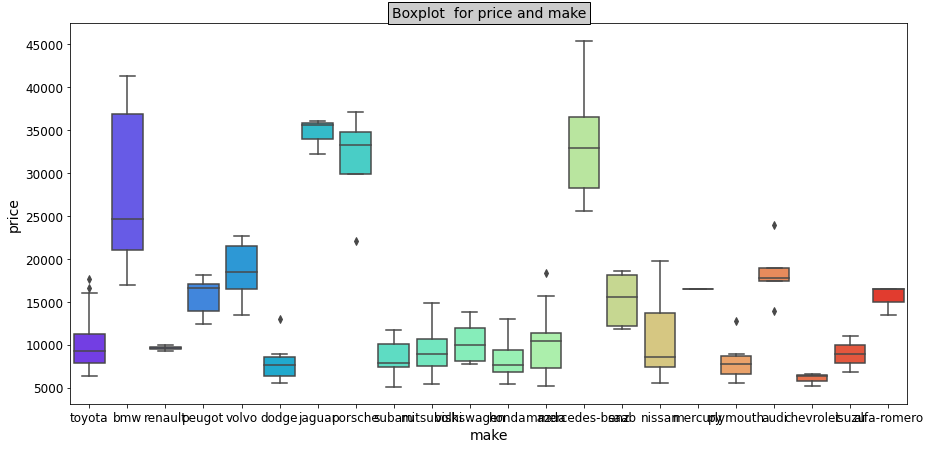

In [29]:
# Creating a custom figure size of 15 X 7 inches
figure = plt.figure(figsize=[15, 7])

# Using magic of seaborn's boxplot() function
sns.boxplot(x='make', y='price', palette='rainbow', data=car_train_data)

# Changing x-ticks ranging from 0 to 81 with step size of 5 and label size of 12
plt.xticks(size=12)

# Changing y-ticks ranging from 0 to 801 with step size of 50 and label size of 12
plt.yticks(size=12)

# Labelling x-axis with a custom label and size of 14
plt.xlabel(xlabel='make', size=14)

# Labelling y-axis with a custom label and size of 14
plt.ylabel(ylabel='price', size=14)

# Labelling title with a custom label and size of 14
#plt.title(label='price per make', size=16)
plt.title("Boxplot  for price and make", bbox={'facecolor':'0.8'},fontsize = 14)
# Dispaly the output by rendering visual on the screen
plt.show()

In [30]:
groupby_make = pd.DataFrame(car_train_data.groupby('make', as_index=False)['price'].median())
groupby_make.head()

,make,price
0,alfa-romero,16500.00
1,audi,17710.00
2,bmw,24565.00
3,chevrolet,6295.00
4,dodge,7609.00


In [31]:
car_train_data.groupby('num-of-doors')['price'].aggregate(['min', np.median, max])

,min,median,max
num-of-doors,,,
four,6229,10746.50,40960
two,5118,9980.00,45400


In [32]:
car_train_data.groupby('make')['price'].aggregate(['min', np.median, 'max'])[0:5].unstack()

        make       
min     alfa-romero   13495.00
        audi          13950.00
        bmw           16925.00
        chevrolet      5151.00
        dodge          5572.00
median  alfa-romero   16500.00
        audi          17710.00
        bmw           24565.00
        chevrolet      6295.00
        dodge          7609.00
max     alfa-romero   16500.00
        audi          23875.00
        bmw           41315.00
        chevrolet      6575.00
        dodge         12964.00
dtype: float64

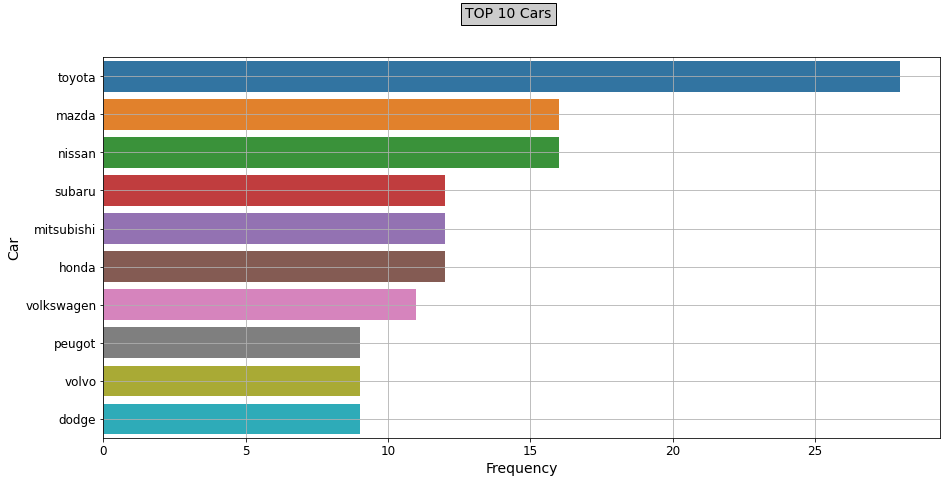

In [33]:
from collections import Counter  
# Get top 10 cars  and frequency
carscount = Counter(car_train_data['make'].dropna().tolist()).most_common(10)
country_idx = [ca[0] for ca in carscount]
country_val = [ca[1] for ca in carscount]

# Initiate an empty figure
fig = plt.figure(figsize=[15, 7])

# Plot the barplot figure
sns.barplot(x=country_val, y=country_idx)

# Add some cosmetics
plt.suptitle("TOP 10 Cars", bbox={'facecolor':'0.8'},fontsize = 14)
#plt.title(label='Top 10 cars', size=16)
plt.xlabel(xlabel='Frequency', size=14)
plt.ylabel(ylabel='Car', size=14)

plt.xticks(size=12)
plt.yticks(size=12)
plt.grid(b=True)

# Output the figure
plt.show()

In [34]:
#temp_df = car_train_data.groupby(['make'], as_index=False)['price'].max().sort_values(by='price', ascending = False)
#tr_df = temp_df.rename(columns = {'price':'sum of make'})
#tr_df.head()

In [35]:
df_car = car_train_data.groupby(['make'], as_index=False)['price'].aggregate(['min', np.median, max])
car_df = df_car.rename(columns = {'price': 'Price Range of Cars'})
car_df.head()
#df_car.head()

,min,median,max
make,,,
alfa-romero,13495,16500.00,16500
audi,13950,17710.00,23875
bmw,16925,24565.00,41315
chevrolet,5151,6295.00,6575
dodge,5572,7609.00,12964


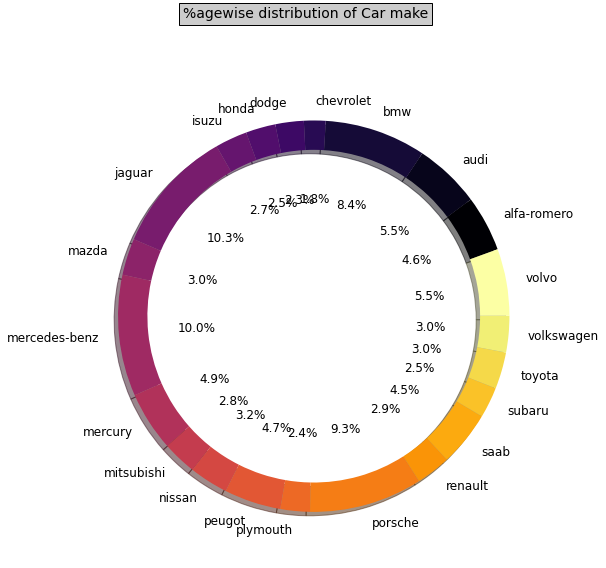

In [36]:
# Creating a pie plot for revenue per month
plt.suptitle("%agewise distribution of Car make",
             bbox={'facecolor': '0.8'}, fontsize=14)
car_train_data.groupby(['make'])['price'].mean().plot(kind='pie',autopct='%3.1f%%',wedgeprops=dict(
                                                       width=0.15),figsize=(9, 9),fontsize=12,
                                                      # explode=np.ones(30)/10,
                                                      startangle=20,shadow=True,cmap='inferno',label='')
                                                      # legend=True,label='')
#plt.xlabel(xlabel='price per make', fontsize=16)
# Display the output
plt.show()

- Price of how many cars are above 29000 ?

In [37]:
car_train_data.loc[car_train_data['price'] > 29000]['make'].unique()

array(['jaguar', 'porsche', 'mercedes-benz', 'bmw'], dtype=object)

- What are the different fuel types used by the car?

<AxesSubplot:ylabel='Frequency'>

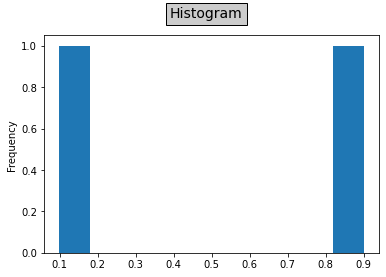

In [38]:
plt.suptitle("Histogram", bbox={'facecolor':'0.8'},fontsize = 14)
car_train_data['fuel-type'].value_counts(normalize=True).plot(kind='hist')

In [39]:
freedors= car_train_data[car_train_data['num-of-doors']=='two']
freedors.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
ID,,,,,,,,,,,,,,,,,,,,,,,,,,
2,0,188.00,bmw,gas,std,two,sedan,rwd,front,101.20,176.80,64.80,54.30,2710,ohc,six,164,mpfi,3.31,3.19,9.00,121.00,4250.00,21,28,20970
6,1,118.00,dodge,gas,turbo,two,hatchback,fwd,front,93.70,157.30,63.80,50.80,2128,ohc,four,98,mpfi,3.03,3.39,7.60,102.00,5500.00,24,30,7957
8,3,115.00,porsche,gas,std,two,hardtop,rwd,rear,89.50,168.90,65.00,51.60,2756,ohcf,six,194,mpfi,3.74,2.90,9.50,207.00,5900.00,17,25,32528
10,3,153.00,mitsubishi,gas,turbo,two,hatchback,fwd,front,96.30,173.00,65.40,49.40,2370,ohc,four,110,spdi,3.17,3.46,7.50,116.00,5500.00,23,30,9959
14,1,107.00,honda,gas,std,two,sedan,fwd,front,96.50,169.10,66.00,51.00,2293,ohc,four,110,2bbl,3.15,3.58,9.10,100.00,5500.00,25,31,10345


- How many doors and how many cars are of each category ?

four    104
two      77
Name: num-of-doors, dtype: int64

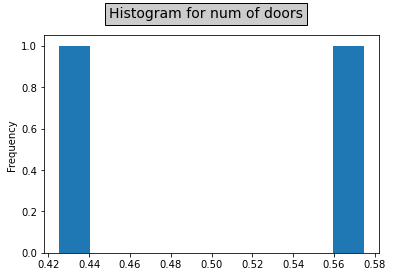

In [40]:
plt.suptitle("Histogram for num of doors", bbox={'facecolor':'0.8'},fontsize = 14)
car_train_data['num-of-doors'].value_counts(normalize=True).plot(kind='hist')
car_train_data['num-of-doors'].value_counts()

In [41]:
car_train_data['symboling'].value_counts(normalize=True)

 0   0.33
 1   0.25
 2   0.15
 3   0.14
-1   0.12
-2   0.01
Name: symboling, dtype: float64

- What is the distribution pattern of our target variable 'price'  looks like ? 

<AxesSubplot:ylabel='Density'>

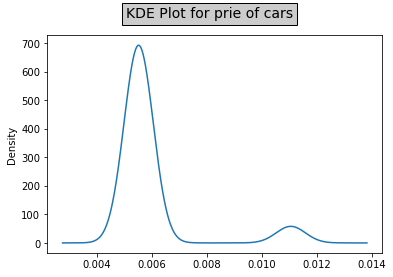

In [42]:
plt.suptitle("KDE Plot for prie of cars", bbox={'facecolor':'0.8'},fontsize = 14)
car_train_data['price'].value_counts(normalize=True).plot(kind='kde')

- What is the percentage of forward, reverse and four wheel drives ?

fwd    108
rwd     65
4wd      8
Name: drive-wheels, dtype: int64

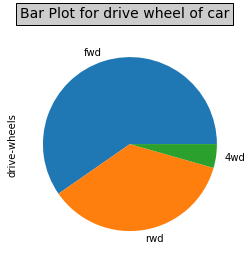

In [43]:
plt.suptitle("Bar Plot for drive wheel of car", bbox={'facecolor':'0.8'},fontsize = 14)
car_train_data['drive-wheels'].value_counts(normalize=True).plot(kind='pie')
car_train_data['drive-wheels'].value_counts()

- What is the unique values of  wheel drives ?

In [44]:
print(car_train_data['drive-wheels'].unique())

['fwd' 'rwd' '4wd']


In [45]:
car_train_data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [46]:
print(numerical_features)

Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')


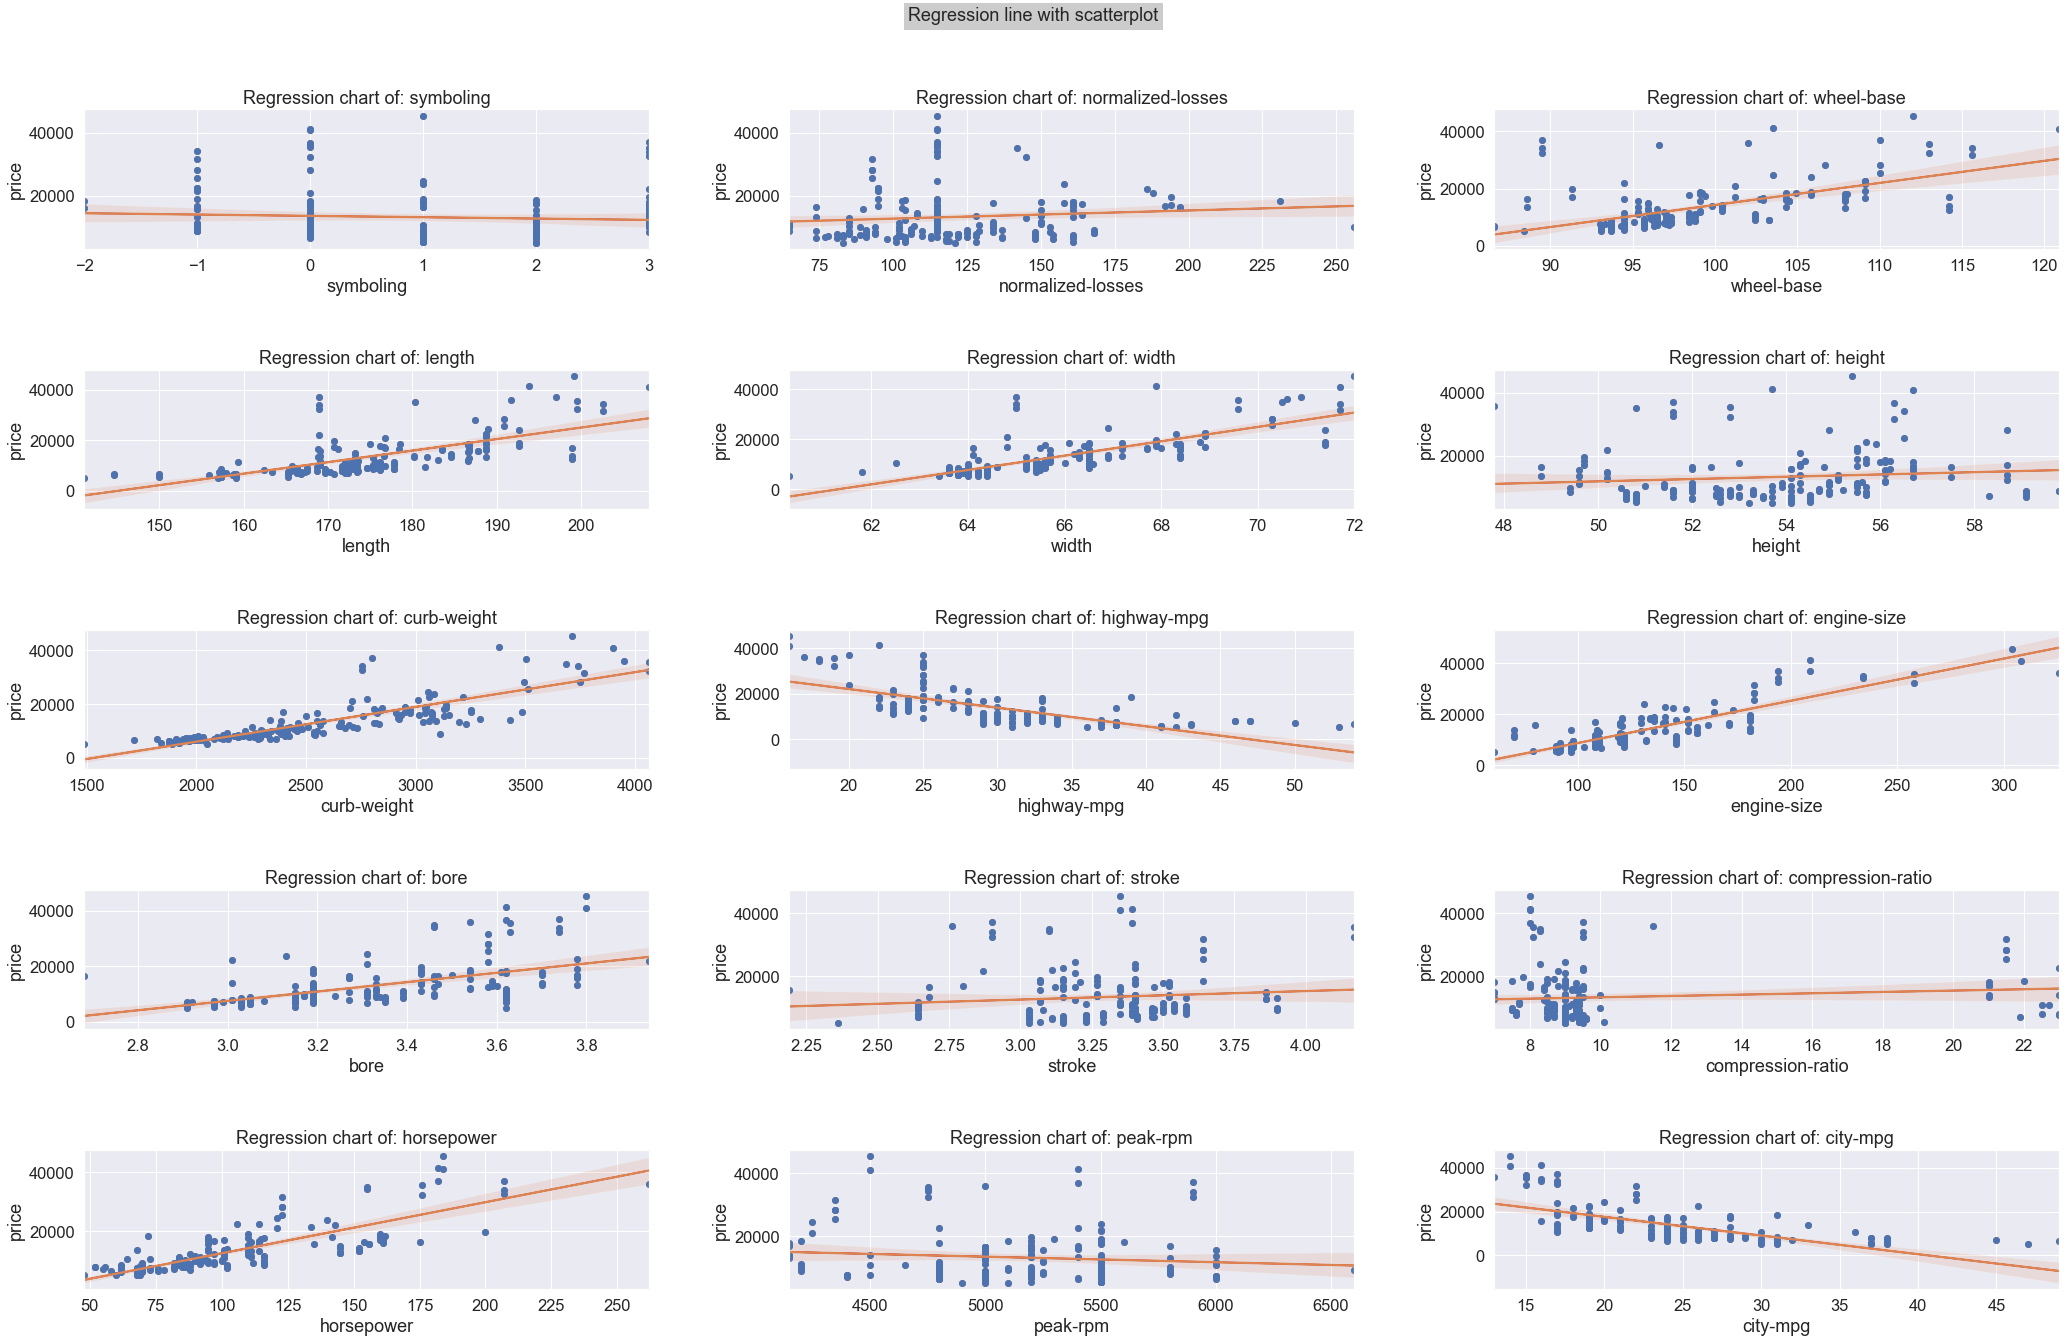

In [47]:
numerical_features = ['symboling', 'normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight','highway-mpg', 
                      'engine-size', 'bore', 'stroke','compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg']
fig = plt.figure(figsize=(30, 30))
# Plotting Regression chart for each predictor vs the target variable
for u in numerical_features:         
    #print(u)
    cntss = numerical_features.index(u)    
    #print(cntss)
    x, y = car_train_data[u], car_train_data.price 
    beta, beta0, r_value, p_value, std_err = stats.linregress(x,y)        
    yhat = beta * x + beta0 # regression line 
    fig.tight_layout(pad=3.0)
    sns.set(font_scale=1.5)
    plt.suptitle("Regression line with scatterplot", bbox={'facecolor':'0.8', 'pad':5}, fontsize = 18)   
    subsc = fig.add_subplot(8, 3, cntss+1)
    #colors = np.random.rand(4)
    sns.set_style("white")
    plt.plot(x, yhat, 'r-', x, y,'o')
    #subsc.set_xlabel(u.upper() +" VS "+ 'price')         
    plt.xlabel(u)
    plt.ylabel('price')    
    sns.regplot(x=u, y="price", data=car_train_data, ax=subsc)                          
    #print("y = %f x + %f, r: %f, r-squared: %f,\np-value: %f, std_err: %f"
    #% (beta, beta0, r_value, r_value**2, p_value, std_err))
    #plt.suptitle('Regression charts of: '+ str(u))   
    subsc.title.set_text('Regression chart of: '+ str(u))   
    #subsc.title.set_text("y = %f x + %f, r: %f, r-squared: %f,\np-value: %f, std_err: %f"
    #% (beta, beta0, r_value, r_value**2, p_value, std_err))  

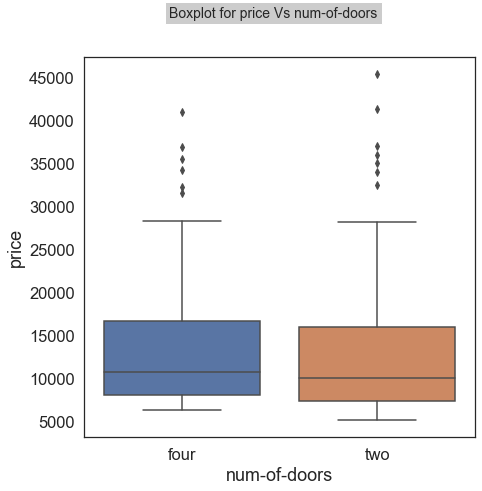

In [48]:
plt.figure(figsize=(7, 7))
plt.suptitle("Boxplot for price Vs num-of-doors", bbox={'facecolor':'0.8'},fontsize = 14)
sns.boxplot(data=car_train_data, x='num-of-doors', y='price');

In [49]:
car_train_data.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.00,0.48,-0.54,-0.36,-0.23,-0.56,-0.21,-0.09,-0.07,0.02,-0.21,0.11,0.29,-0.07,0.00,-0.07
normalized-losses,0.48,1.00,-0.08,-0.01,0.09,-0.39,0.09,0.09,-0.03,0.11,-0.09,0.21,0.25,-0.20,-0.16,0.10
wheel-base,-0.54,-0.08,1.00,0.88,0.82,0.58,0.77,0.58,0.48,0.23,0.30,0.36,-0.38,-0.44,-0.52,0.58
length,-0.36,-0.01,0.88,1.00,0.86,0.47,0.88,0.70,0.62,0.20,0.20,0.57,-0.30,-0.65,-0.69,0.69
width,-0.23,0.09,0.82,0.86,1.00,0.29,0.86,0.74,0.55,0.23,0.22,0.61,-0.25,-0.63,-0.68,0.76
height,-0.56,-0.39,0.58,0.47,0.29,1.00,0.28,0.06,0.17,-0.03,0.29,-0.13,-0.32,-0.01,-0.07,0.11
curb-weight,-0.21,0.09,0.77,0.88,0.86,0.28,1.00,0.86,0.65,0.22,0.20,0.76,-0.29,-0.74,-0.79,0.84
engine-size,-0.09,0.09,0.58,0.70,0.74,0.06,0.86,1.00,0.58,0.20,0.05,0.82,-0.26,-0.65,-0.68,0.87
bore,-0.07,-0.03,0.48,0.62,0.55,0.17,0.65,0.58,1.00,-0.11,0.03,0.57,-0.29,-0.59,-0.60,0.55
stroke,0.02,0.11,0.23,0.20,0.23,-0.03,0.22,0.20,-0.11,1.00,0.18,0.10,-0.05,-0.08,-0.08,0.10


In [50]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
car_train_data['fuel-type']= le.fit_transform(car_train_data['fuel-type'])
car_train_data['aspiration']= le.fit_transform(car_train_data['aspiration'])
car_train_data['engine-location']= le.fit_transform(car_train_data['engine-location'])
car_train_data['drive-wheels']= le.fit_transform(car_train_data['drive-wheels'])
car_train_data['body-style']= le.fit_transform(car_train_data['body-style'])
car_train_data['num-of-cylinders']= le.fit_transform(car_train_data['num-of-cylinders'])
car_train_data['engine-type']= le.fit_transform(car_train_data['engine-type'])

In [51]:
le = LabelEncoder()
car_test_data['fuel-type']= le.fit_transform(car_test_data['fuel-type'])
car_test_data['aspiration']= le.fit_transform(car_test_data['aspiration'])
car_test_data['engine-location']= le.fit_transform(car_test_data['engine-location'])
car_test_data['drive-wheels']= le.fit_transform(car_test_data['drive-wheels'])
car_test_data['body-style']= le.fit_transform(car_test_data['body-style'])
car_test_data['num-of-cylinders']= le.fit_transform(car_test_data['num-of-cylinders'])
car_test_data['engine-type']= le.fit_transform(car_test_data['engine-type'])

In [52]:
#The third rating corresponds to a  value which is normalized for all autos within a particular size
#classification (two-door small, station wagons, sports/speciality) and represents the average loss per car per year.

car_train_data["num-of-doors"] = car_train_data["num-of-doors"].map({"two": 0, "four":1})
print(car_train_data['num-of-doors'].value_counts())
car_test_data["num-of-doors"] = car_test_data["num-of-doors"].map({"two": 0, "four":1})
print(car_test_data['num-of-doors'].value_counts())

1    104
0     77
Name: num-of-doors, dtype: int64
1    11
0     9
Name: num-of-doors, dtype: int64


In [54]:
print(car_train_data['symboling'].value_counts())

 0    59
 1    45
 2    28
 3    26
-1    21
-2     2
Name: symboling, dtype: int64


In [55]:
# symbolling factor i.e., a value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

car_train_data["symboling"] = car_train_data["symboling"].map({3: 0, 2: 1, 1: 2, 0: 3, -1: 4, -2: 5, -3: 6})
print(car_train_data['symboling'].value_counts())

3    59
2    45
1    28
0    26
4    21
5     2
Name: symboling, dtype: int64


In [56]:
car_test_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
ID,,,,,,,,,,,,,,,,,,,,,,,,,
1,-2,103.00,volvo,1,0,1,1,1,0,104.30,188.80,67.20,56.20,2912,2,1,141,mpfi,3.78,3.15,9.50,114,5400,23,28
2,0,188.00,bmw,1,0,1,1,1,0,101.20,176.80,64.80,54.30,2765,2,2,164,mpfi,3.31,3.19,9.00,121,4250,21,28
3,-1,74.00,volvo,1,1,1,2,1,0,104.30,188.80,67.20,57.50,3157,2,1,130,mpfi,3.62,3.15,7.50,162,5100,17,22
4,1,154.00,plymouth,1,0,1,1,0,0,93.70,167.30,63.80,50.80,1989,2,1,90,2bbl,2.97,3.23,9.40,68,5500,31,38
5,1,103.00,nissan,1,0,1,2,0,0,94.50,170.20,63.80,53.50,2037,2,1,97,2bbl,3.15,3.29,9.40,69,5200,31,37


In [57]:
#car_train_data = car_train_data.reset_index(drop=True)

In [58]:
car_train_data['engine-type']=car_train_data['engine-type'].replace('l','ohc')
car_train_data['engine-type'].unique()

array([2, 1, 0, 3, 5, 4])

In [59]:
car_test_data['engine-type']=car_train_data['engine-type'].replace('l','ohc')
car_test_data['engine-type'].unique()

array([2, 1, 0, 3])

In [60]:
car_train_data['engine-type'].value_counts()

2    128
3     15
4     13
0     11
1     10
5      4
Name: engine-type, dtype: int64

In [61]:
car_test_data['engine-type'].value_counts()

2    14
3     4
0     1
1     1
Name: engine-type, dtype: int64

In [62]:
len(car_train_data.columns)

26

In [63]:
len(car_test_data.columns)

25

In [64]:
car_train_data["engine_spec"]=car_train_data["bore"].astype(str)+"x"+car_train_data["stroke"].astype(str)+"x"+car_train_data["compression-ratio"].astype(str)+"x"+car_train_data["peak-rpm"].astype(str)

In [65]:
car_test_data["engine_spec"]=car_test_data["bore"].astype(str)+"x"+car_test_data["stroke"].astype(str)+"x"+car_test_data["compression-ratio"].astype(str)+"x"+car_test_data["peak-rpm"].astype(str)

In [66]:
car_train_data["engine_spec"]=car_train_data["bore"].astype(str)+"x"+car_train_data["stroke"].astype(str)+"x"+car_train_data["compression-ratio"].astype(str)+"x"+car_train_data["peak-rpm"].astype(str)

In [67]:
car_test_data["engine_spec"]=car_test_data["bore"].astype(str)+"x"+car_test_data["stroke"].astype(str)+"x"+car_test_data["compression-ratio"].astype(str)+"x"+car_test_data["peak-rpm"].astype(str)

In [68]:
#car_train_data1.drop()

In [69]:
car_train_data.drop(["bore","stroke", "compression-ratio", "peak-rpm"], axis = 1, inplace = True)

In [70]:
car_test_data.drop(["bore","stroke", "compression-ratio", "peak-rpm"], axis = 1, inplace = True)

In [71]:
car_train_data["car_spec"]=car_train_data["length"].astype(str)+"x"+car_train_data["width"].astype(str)+"x"+car_train_data["height"].astype(str)+"x"+car_train_data["wheel-base"].astype(str)
car_train_data.drop(["length","width", "height", "wheel-base","fuel-system"], axis = 1, inplace = True)

In [72]:
car_test_data["car_spec"]=car_test_data["length"].astype(str)+"x"+car_test_data["width"].astype(str)+"x"+car_test_data["height"].astype(str)+"x"+car_test_data["wheel-base"].astype(str)
car_test_data.drop(["length","width", "height", "wheel-base","fuel-system"], axis = 1, inplace = True)

In [73]:
car_train_data1=car_train_data.copy()

In [74]:
car_test_data1=car_test_data.copy()

In [75]:
car_train_data1.drop(["engine_spec","car_spec"], axis = 1, inplace = True)

In [76]:
car_test_data1.drop(["engine_spec","car_spec"], axis = 1, inplace = True)

In [77]:
car_train_data1.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,curb-weight,engine-type,num-of-cylinders,engine-size,horsepower,city-mpg,highway-mpg,price
ID,,,,,,,,,,,,,,,,,
1,4,65.00,toyota,1,0,1,2,1,0,2458,2,2,122,92.00,27,32,11248
2,3,188.00,bmw,1,0,0,3,2,0,2710,2,3,164,121.00,21,28,20970
3,3,115.00,renault,1,0,1,4,1,0,2579,2,2,132,95.00,23,31,9295
4,3,161.00,peugot,0,1,1,3,2,0,3197,1,2,152,95.00,28,33,13200
5,5,103.00,volvo,1,0,1,3,2,0,2935,2,2,141,114.00,24,28,15985
6,2,118.00,dodge,1,1,0,2,1,0,2128,2,2,98,102.00,24,30,7957
7,3,145.00,jaguar,1,0,1,3,2,0,4066,0,3,258,176.00,15,19,32250
8,0,115.00,porsche,1,0,0,1,2,1,2756,3,3,194,207.00,17,25,32528
9,3,89.00,subaru,1,0,1,4,1,0,2455,3,2,108,94.00,25,31,10198


Text(0.5, 0.98, "Histogram for ['symboling', 'normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']")

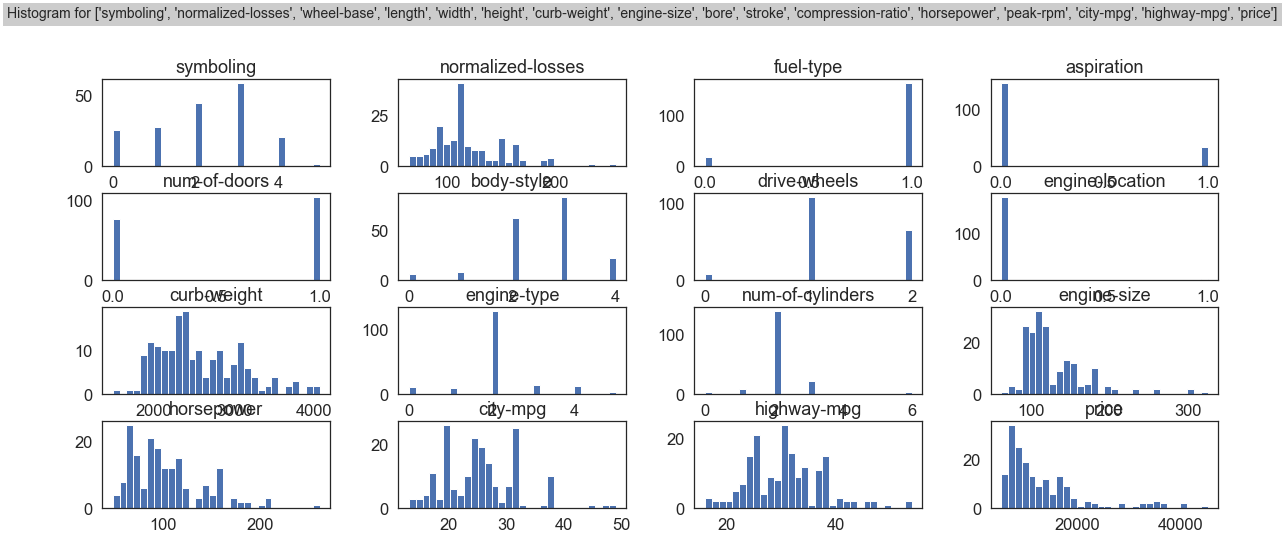

In [78]:
car_train_data1.hist(figsize=(20,10), grid=False, layout=(5, 4), bins = 30)
plt.suptitle("Histogram for "+ str(num_cols), bbox={'facecolor':'0.8', 'pad':5},fontsize = 14)

- The skewness values can be interpreted in the following manner:
- Highly skewed distribution: If the skewness value is less than −1 or greater than +1.
- Moderately skewed distribution: If the skewness value is between −1 and −½ or between +½ and +1.
- Approximately symmetric distribution: If the skewness value is between −½ and +½.

In [80]:
car_train_data1.var()

symboling                  1.61
normalized-losses       1003.80
fuel-type                  0.09
aspiration                 0.15
num-of-doors               0.25
body-style                 0.78
drive-wheels               0.31
engine-location            0.02
curb-weight           274040.75
engine-type                0.86
num-of-cylinders           0.67
engine-size             1812.92
horsepower              1426.43
city-mpg                  41.19
highway-mpg               47.45
price               65715012.07
dtype: float64

In [81]:
car_train_data1.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,181.00,2.15,1.27,0.00,1.00,2.00,3.00,5.00
normalized-losses,181.00,119.76,31.68,65.00,98.00,115.00,134.00,256.00
fuel-type,181.00,0.90,0.30,0.00,1.00,1.00,1.00,1.00
aspiration,181.00,0.19,0.39,0.00,0.00,0.00,0.00,1.00
num-of-doors,181.00,0.57,0.50,0.00,0.00,1.00,1.00,1.00
body-style,181.00,2.59,0.88,0.00,2.00,3.00,3.00,4.00
drive-wheels,181.00,1.31,0.55,0.00,1.00,1.00,2.00,2.00
engine-location,181.00,0.02,0.13,0.00,0.00,0.00,0.00,1.00
curb-weight,181.00,2564.17,523.49,1488.00,2190.00,2420.00,2935.00,4066.00
engine-type,181.00,2.12,0.93,0.00,2.00,2.00,2.00,5.00


In [82]:
iqr(car_train_data1["price"])

8725.0

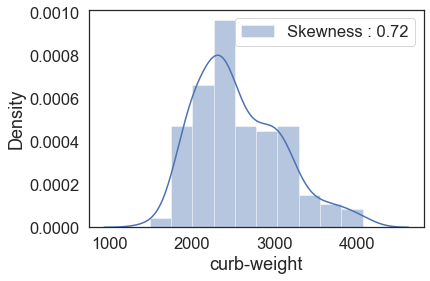

In [83]:
plot12 = sns.distplot(car_train_data1["curb-weight"], color="b", label="Skewness : %.2f"%(car_train_data1["curb-weight"].skew()))
plot12 = plot12.legend(loc="best")

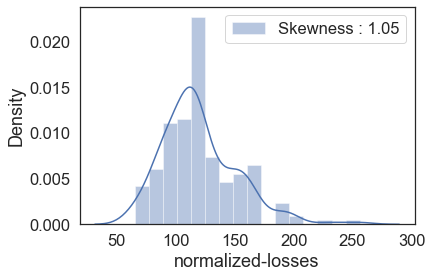

In [84]:
plot1 = sns.distplot(car_train_data1["normalized-losses"], color="b", label="Skewness : %.2f"%(car_train_data1["normalized-losses"].skew()))
plot1 = plot1.legend(loc="best")


In [87]:
print(car_train_data1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181 entries, 1 to 181
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          181 non-null    int64  
 1   normalized-losses  181 non-null    float64
 2   make               181 non-null    object 
 3   fuel-type          181 non-null    int32  
 4   aspiration         181 non-null    int32  
 5   num-of-doors       181 non-null    int64  
 6   body-style         181 non-null    int32  
 7   drive-wheels       181 non-null    int32  
 8   engine-location    181 non-null    int32  
 9   curb-weight        181 non-null    int64  
 10  engine-type        181 non-null    int32  
 11  num-of-cylinders   181 non-null    int32  
 12  engine-size        181 non-null    int64  
 13  horsepower         181 non-null    float64
 14  city-mpg           181 non-null    int64  
 15  highway-mpg        181 non-null    int64  
 16  price              181 non

In [88]:
car_train_data1.skew().ascending=True

Text(0.5, 1.0, 'Boxplot')

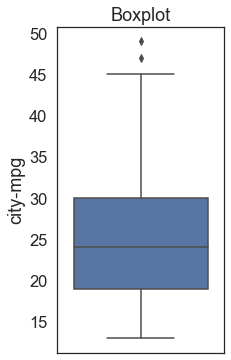

In [89]:
plt.figure(figsize=(3,6))
sns.boxplot(y=car_train_data1['city-mpg'])
plt.title('Boxplot')

In [90]:
numeric_df_correlation = pd.DataFrame(car_train_data1.corr().price)
abs(numeric_df_correlation).sort_values(by='price', ascending=False).T.style.background_gradient(cmap='coolwarm_r')

,price,engine-size,curb-weight,horsepower,highway-mpg,city-mpg,drive-wheels,engine-location,aspiration,fuel-type,engine-type,normalized-losses,body-style,symboling,num-of-cylinders,num-of-doors
price,1.00,0.87,0.84,0.80,0.70,0.68,0.59,0.34,0.18,0.14,0.13,0.10,0.10,0.07,0.02,0.01


Text(0.5, 0.98, 'Correlation between features')

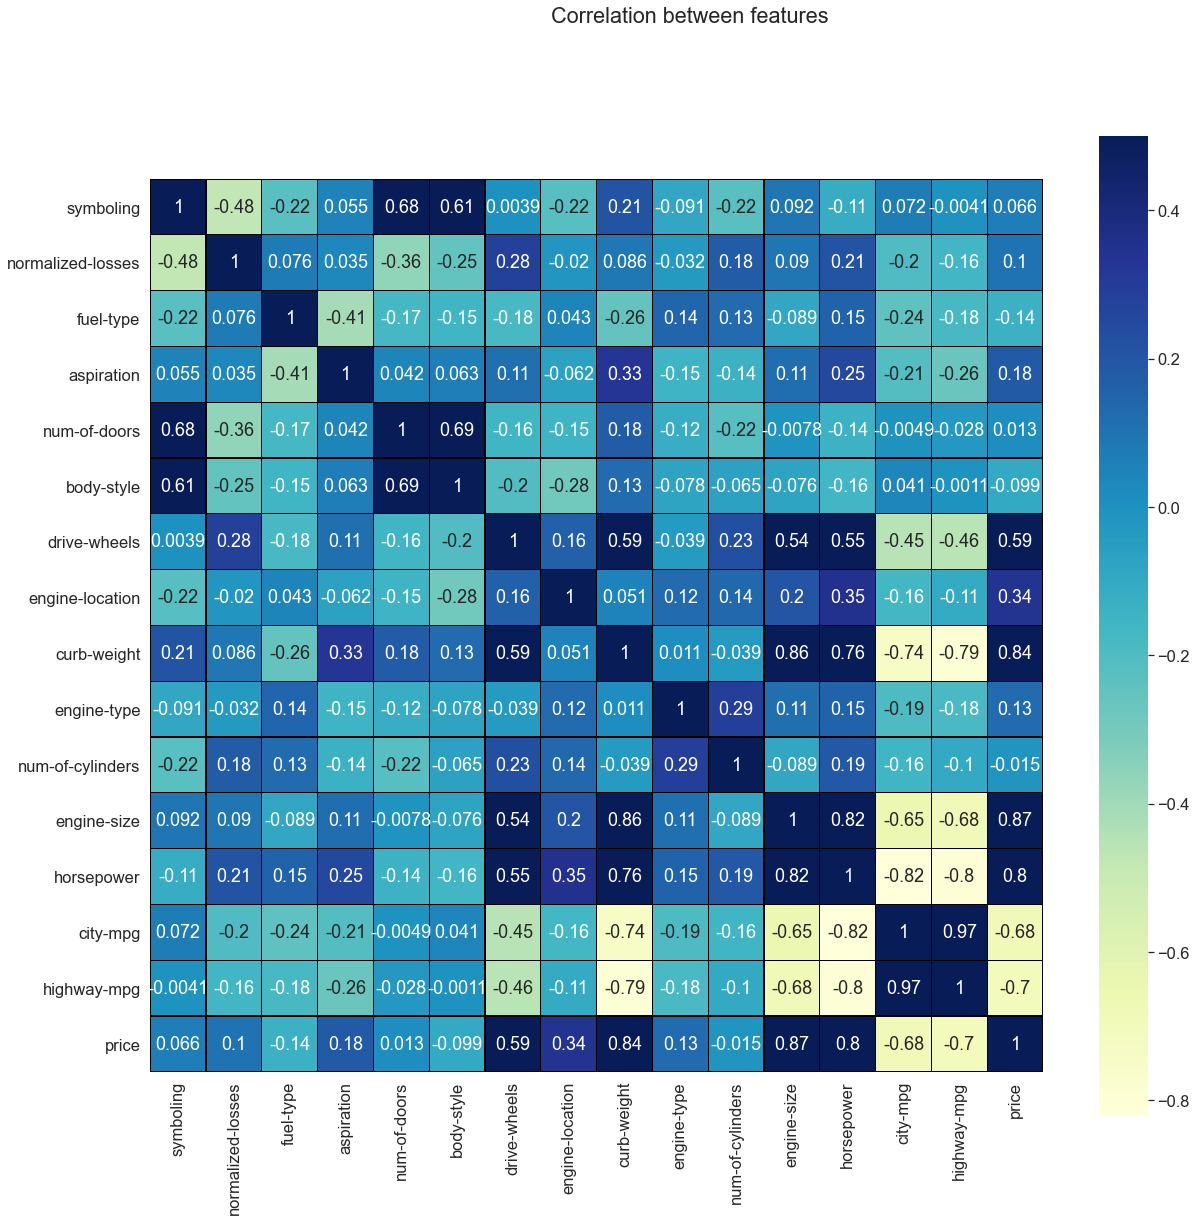

In [91]:
corr = car_train_data1.corr()
plt.figure(figsize=(20,18))
sns.heatmap(corr,vmax=0.5,linewidth=.02, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.suptitle('Correlation between features')

### Observations
- There is high corelation between price and curb-weight,engine-size,horsepower and drive-wheels in a positive way.
- There is high corelation also between price and city-mpg, highway-mpg in  a negative way.

In [92]:
car_train_data1.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,181.00,2.15,1.27,0.00,1.00,2.00,3.00,5.00
normalized-losses,181.00,119.76,31.68,65.00,98.00,115.00,134.00,256.00
fuel-type,181.00,0.90,0.30,0.00,1.00,1.00,1.00,1.00
aspiration,181.00,0.19,0.39,0.00,0.00,0.00,0.00,1.00
num-of-doors,181.00,0.57,0.50,0.00,0.00,1.00,1.00,1.00
body-style,181.00,2.59,0.88,0.00,2.00,3.00,3.00,4.00
drive-wheels,181.00,1.31,0.55,0.00,1.00,1.00,2.00,2.00
engine-location,181.00,0.02,0.13,0.00,0.00,0.00,0.00,1.00
curb-weight,181.00,2564.17,523.49,1488.00,2190.00,2420.00,2935.00,4066.00
engine-type,181.00,2.12,0.93,0.00,2.00,2.00,2.00,5.00


In [93]:
car_train_data1.to_csv("X_train1.csv")

In [94]:
car_test_data1.to_csv("X_test1.csv")

In [95]:
X_trainols = car_train_data1.drop(["price","make","normalized-losses","symboling","curb-weight"], axis=1)
y_trainols = car_train_data1['price']
X_trainols.shape

(181, 12)

In [96]:
X_testols = car_test_data1.drop(["make","normalized-losses","symboling","curb-weight"], axis=1)
X_testols.shape

(20, 12)

In [97]:
X_testols.columns

Index(['fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels',
       'engine-location', 'engine-type', 'num-of-cylinders', 'engine-size',
       'horsepower', 'city-mpg', 'highway-mpg'],
      dtype='object')

In [98]:
X_trainols.columns

Index(['fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels',
       'engine-location', 'engine-type', 'num-of-cylinders', 'engine-size',
       'horsepower', 'city-mpg', 'highway-mpg'],
      dtype='object')

In [99]:
#Normal linear regression(Ordinary Least Square Regression) does not have any hyperparameters to tune.
olsmod = sm.OLS(y_trainols, X_trainols)
olsres = olsmod.fit()
print(olsres.summary())
print("Standard errors: ", olsres.bse)
print("R-squared",olsres.rsquared)

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.956
Model:                            OLS   Adj. R-squared (uncentered):              0.953
Method:                 Least Squares   F-statistic:                              307.1
Date:                Thu, 21 Oct 2021   Prob (F-statistic):                   6.02e-108
Time:                        17:06:32   Log-Likelihood:                         -1720.7
No. Observations:                 181   AIC:                                      3465.
Df Residuals:                     169   BIC:                                      3504.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [100]:
print(olsres.rsquared)
#print(olsres.adjrsquared)

0.9561513376380628


In [101]:
y_pred_trainols = olsres.predict(X_trainols)
y_pred_trainols

ID
1     11701.35
2     17325.33
3     12167.24
4     18693.94
5     16948.33
6      8461.28
7     30653.40
8     34451.27
9     10463.05
10    10149.27
11     9605.56
12    11471.16
13     9833.11
14     9327.92
15    16852.14
16     9549.99
17     5365.78
18    25019.26
19     8069.14
20     3310.61
21    13891.66
22    24789.07
23    12749.92
24    10602.33
25     6411.38
26    11324.83
27    18514.68
28     9832.71
29    16718.14
30    30320.12
31     7725.87
32    11098.63
33     5269.63
34    22309.23
35    19880.06
36    10418.30
37    19244.67
38    18683.13
39    19891.42
40    16780.22
41     5191.72
42     8690.97
43    21221.53
44    11442.54
45    18870.40
46     7619.11
47    10574.91
48    15948.31
49     6432.39
50    25205.03
51    11014.69
52    13531.30
53    16178.50
54     8205.95
55     8205.95
56     6411.38
57    10012.37
58     7315.18
59     8654.57
60    16780.22
61     7180.52
62    12223.30
63    18693.94
64    19891.42
65    11074.98
66    -1531.87
67    1

In [102]:
y_pred_trainols.shape,y_trainols.shape

((181,), (181,))

In [103]:
# ols prediction
usedcar_ols = pd.DataFrame({'Actual value': y_trainols, 'Predicted value': y_pred_trainols})
usedcar_ols.head(10)

,Actual value,Predicted value
ID,,
1,11248,11701.35
2,20970,17325.33
3,9295,12167.24
4,13200,18693.94
5,15985,16948.33
6,7957,8461.28
7,32250,30653.40
8,32528,34451.27
9,10198,10463.05


In [104]:
#Measuring accuracy on training Data
acc_ols = 100- (np.mean(np.abs((y_trainols - y_pred_trainols) / y_trainols)))
print('Accuracy',acc_ols)

Accuracy 99.81510002103084


# Linear Regression 

In [105]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [106]:
# Train the train data
X_trainLR = car_train_data1.drop(["price","make","normalized-losses","symboling","curb-weight"], axis=1)
y_trainLR = car_train_data1['price']
X_trainLR.shape

(181, 12)

In [107]:
# train the TEST DATa
X_testLR = car_test_data1.drop(["make","normalized-losses","symboling","curb-weight"], axis=1)
X_testLR.shape

(20, 12)

In [108]:
X_trainLR.columns

Index(['fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels',
       'engine-location', 'engine-type', 'num-of-cylinders', 'engine-size',
       'horsepower', 'city-mpg', 'highway-mpg'],
      dtype='object')

In [109]:
X_testLR.columns

Index(['fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels',
       'engine-location', 'engine-type', 'num-of-cylinders', 'engine-size',
       'horsepower', 'city-mpg', 'highway-mpg'],
      dtype='object')

In [110]:
X_trainLR.shape,X_testLR.shape

((181, 12), (20, 12))

In [111]:
numeric_features = X_trainLR[['fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels',
       'engine-location', 'engine-type', 'num-of-cylinders', 'engine-size',
       'horsepower', 'city-mpg', 'highway-mpg']].columns 
numeric_features

Index(['fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels',
       'engine-location', 'engine-type', 'num-of-cylinders', 'engine-size',
       'horsepower', 'city-mpg', 'highway-mpg'],
      dtype='object')

In [112]:
X_trainLR.columns.difference(numeric_features)

Index([], dtype='object')

In [113]:
sc =StandardScaler()
sc.fit_transform(X_trainLR)
#ss.transform(X_test) # this is only transform and not fit transform

array([[ 0.33230927, -0.48092881,  0.86045605, ..., -0.32037014,
         0.29176096,  0.19704391],
       [ 0.33230927, -0.48092881, -1.16217441, ...,  0.4496037 ,
        -0.64567218, -0.38524096],
       [ 0.33230927, -0.48092881,  0.86045605, ..., -0.24071767,
        -0.33319447,  0.0514727 ],
       ...,
       [ 0.33230927, -0.48092881, -1.16217441, ..., -0.95758986,
         1.85414951,  1.50718488],
       [ 0.33230927, -0.48092881, -1.16217441, ...,  0.18409548,
        -0.64567218, -0.53081218],
       [ 0.33230927, -0.48092881,  0.86045605, ...,  1.37888246,
        -0.95814989, -0.96752583]])

In [114]:
X_trainLR.columns

Index(['fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels',
       'engine-location', 'engine-type', 'num-of-cylinders', 'engine-size',
       'horsepower', 'city-mpg', 'highway-mpg'],
      dtype='object')

In [115]:
X_testLR.columns

Index(['fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels',
       'engine-location', 'engine-type', 'num-of-cylinders', 'engine-size',
       'horsepower', 'city-mpg', 'highway-mpg'],
      dtype='object')

In [116]:
X_trainLR[numeric_features] = sc.fit_transform(X_trainLR[numeric_features])
X_testLR[numeric_features] = sc.transform(X_testLR[numeric_features])

In [117]:
model = LinearRegression()
model

LinearRegression()

In [118]:
# Model training
model.fit(X_trainLR, y_trainLR)

LinearRegression()

In [119]:
coeff_df = pd.DataFrame(model.coef_,X_trainLR.columns,columns=['Coefficient'])
intercept = model.intercept_
print(coeff_df,"\nIntecept =",intercept)

                  Coefficient
fuel-type            -1169.33
aspiration            -296.35
num-of-doors           616.72
body-style            -330.78
drive-wheels           997.34
engine-location       1203.86
engine-type            320.10
num-of-cylinders      -482.89
engine-size           3743.87
horsepower            1619.93
city-mpg               602.01
highway-mpg          -2060.47 
Intecept = 13271.314917127072


In [120]:
y_pred_train1 = model.predict(X_trainLR)  
y_pred_train1

array([11827.96735419, 17006.15782998, 12009.53892255, 18630.53850709,
       16799.08356513,  8453.51991188, 30349.76266467, 34402.51587519,
       10384.88745033, 10019.6836421 ,  9664.33188463, 11451.51497977,
        9868.60599277,  9601.9601981 , 16705.02638838,  9431.18216694,
        5391.51478476, 25342.20758605,  8472.09569779,  1943.47839385,
       13883.76667317, 24965.75521163, 13012.82139468, 10869.65078914,
        6174.28730856, 11902.02715965, 18276.2353685 ,  9835.43276393,
       16422.63119071, 30769.13211468,  7800.44330712, 11091.35838324,
        5303.34203006, 21963.4636306 , 20133.18622538, 10869.62320204,
       19059.33569103, 18434.37769039, 20371.48096212, 16746.38268282,
        5221.62417489,  8964.48748544, 21017.15282013, 11649.35826465,
       18554.82494267,  7548.03146026, 10555.45120653, 15855.1315917 ,
        6639.96004305, 24926.96488359, 11013.37331695, 14612.0813773 ,
       16231.58396612,  8619.6213531 ,  8619.6213531 ,  6174.28730856,
      

In [121]:
y_pred_train1.shape,y_trainLR.shape

((181,), (181,))

In [122]:
# linear model
usedcarLR = pd.DataFrame({'Actual value': y_trainLR, 'Predicted value': y_pred_train1})
usedcarLR.head(10)

,Actual value,Predicted value
ID,,
1,11248,11827.97
2,20970,17006.16
3,9295,12009.54
4,13200,18630.54
5,15985,16799.08
6,7957,8453.52
7,32250,30349.76
8,32528,34402.52
9,10198,10384.89


In [123]:
met_results = pd.DataFrame()
met_results

""


In [124]:
tempResults=pd.DataFrame({'Metrics':['OLS - R squared Training data'],'Values':[olsres.rsquared]})
met_results = pd.concat([met_results,tempResults])
tempResults2=pd.DataFrame({'Metrics':['OLS - Adjusted R squared Training data'],'Values':[olsres.rsquared_adj]})
met_results = pd.concat([met_results,tempResults2])
tempResults3=pd.DataFrame({'Metrics':['OLS - Accurancy'],'Values':[acc_ols]})
met_results = pd.concat([met_results,tempResults3])
met_results.reset_index(drop=True, inplace=True)
met_results

,Metrics,Values
0,OLS - R squared Training data,0.96
1,OLS - Adjusted R squared Training data,0.95
2,OLS - Accurancy,99.82


In [125]:
#Computing the MSE for our resale value predictions¶
from sklearn import metrics 
MAE_train = metrics.mean_absolute_error(y_trainLR, y_pred_train1)
print('MAE for training set is {}'.format(MAE_train))

MAE for training set is 2318.1546514062425


In [126]:
MSE_train = metrics.mean_squared_error(y_trainLR, y_pred_train1)
print('MSE for training set is {}'.format(MSE_train))

MSE for training set is 10456174.857398368


In [127]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_trainLR, y_pred_train1))
print('RMSE for training set is {}'.format(RMSE_train))

RMSE for training set is 3233.6009118934835


In [128]:
r2_train = metrics.r2_score(y_trainLR,y_pred_train1)
print("R2 score for training set is {}".format(r2_train))

R2 score for training set is 0.8400020880142631


In [129]:
adj_r_squared_train = 1 - (1-r2_train)*(len(y_trainLR)-1)/(len(y_trainLR)-X_trainLR.shape[1]-1)
print("Adjusted R2 score for training set is {}".format(adj_r_squared_train))

Adjusted R2 score for training set is 0.8285736657295676


In [130]:
# import mean squared error from sklearn.metric
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_trainLR, y_pred_train1))
print('Root Mean Squared Error is: ', rmse)

Root Mean Squared Error is:  3233.6009118934835


In [131]:
#Measuring accuracy on Testing Data
accLR = 100-(np.mean(np.abs((y_trainLR - y_pred_train1) / y_trainLR)))
print('Accuracy',accLR)

Accuracy 99.8123515787988


# Predict the output target variable

In [132]:
y_pred_test = model.predict(X_testLR)          
y_pred_test

array([16241.89271265, 17790.42180716, 17436.64931835,  5364.76278514,
        6294.86689697,  8841.56920659, 15642.71871514, 14829.03065172,
        6812.75520057,  5016.55386371, 11438.89348392,  5423.92161848,
        8451.7225996 ,  4834.77341116, 13689.15929656, 26057.61970846,
       11475.7235961 , 14020.1663081 , 11572.10191771, 11747.92087206])

In [133]:
temp1=pd.DataFrame({'Metrics':['LR - Mean Absolute Error (MAE) - Training data'],'Values':[MAE_train]})
temp2=pd.DataFrame({'Metrics':['LR - Mean Squared Error (MSE) - Training data'],'Values':[MSE_train]})
temp3=pd.DataFrame({'Metrics':['LR - Root Mean Squared Error (RMSE) - Training data '],'Values':[RMSE_train]})
temp4=pd.DataFrame({'Metrics':['LR R Squared - Training data '],'Values':[adj_r_squared_train]})
temp5=pd.DataFrame({'Metrics':['LR Adj R Squared - Training data '],'Values':[adj_r_squared_train]})
temp6=pd.DataFrame({'Metrics':['LR Accuracy - Training data '],'Values':[accLR]})
met_results = pd.concat( [met_results,temp1,temp2,temp3,temp4,temp5,temp6] )
met_results = met_results[['Metrics','Values']]
met_results.reset_index(drop=True, inplace=True)
met_results

,Metrics,Values
0,OLS - R squared Training data,0.96
1,OLS - Adjusted R squared Training data,0.95
2,OLS - Accurancy,99.82
3,LR - Mean Absolute Error (MAE) - Training data,2318.15
4,LR - Mean Squared Error (MSE) - Training data,10456174.86
5,LR - Root Mean Squared Error (RMSE) - Training...,3233.60
6,LR R Squared - Training data,0.83
7,LR Adj R Squared - Training data,0.83
8,LR Accuracy - Training data,99.81


In [134]:
# To create Dataframe of predicted value with particular respective indexcar
carpredict = pd.DataFrame(y_pred_test) 
carpredict.index = X_testLR.index 
carpredict.columns = ["Used_Cars_prediction_test_data"]
carpredict.to_csv('usedcar_project_submission_sagar1.csv',header=False)